In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression


In [105]:
car_df=pd.read_csv('cars-dataset.csv')

In [106]:
car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [107]:
car_df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [108]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [109]:
car_df.isna().all()

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [110]:
car_df.isnull().all()

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [111]:
car_df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [112]:
# contains '?' so removing the values
q_index=car_df[car_df.hp=='?'].index



In [113]:
car_df=car_df.drop(index=q_index)

In [114]:
#converting HP to int

car_df['hp']=pd.to_numeric(car_df['hp'])

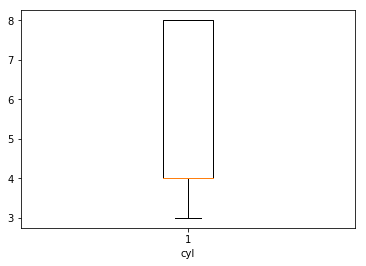

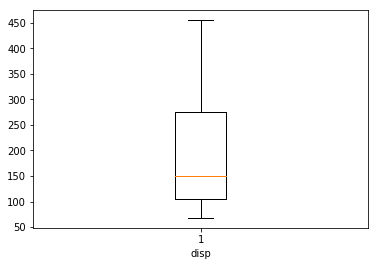

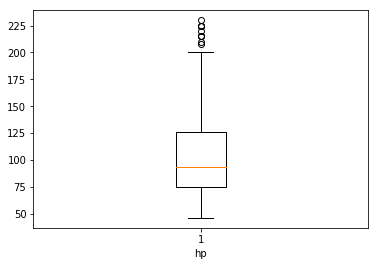

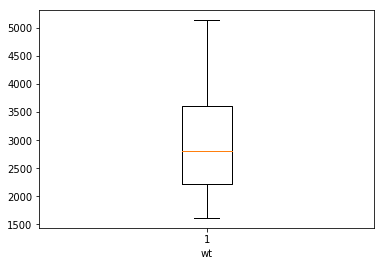

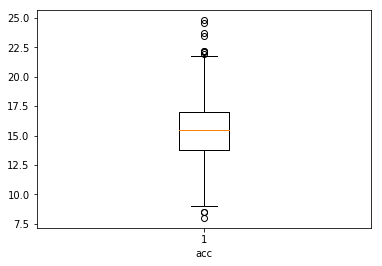

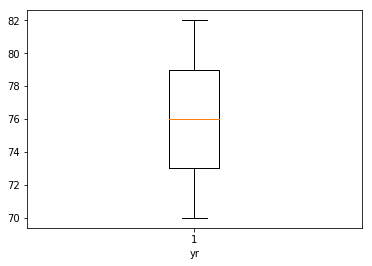

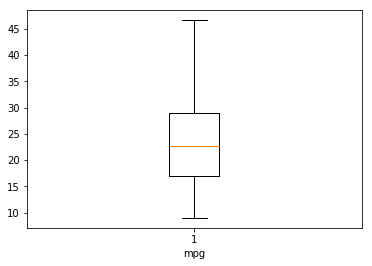

In [115]:
for i,cols in enumerate(car_df.drop(columns=['car name'])):
    plt.figure(i)
    plt.xlabel(cols)
    plt.boxplot(car_df[cols])

In [116]:
#outliers treatment
# Hp and Acc contains some outliers values
Q1=car_df[['hp','acc']].quantile(0.25)
Q3=car_df[['hp','acc']].quantile(0.75)
IQR=Q3-Q1

In [117]:
Min_cap=Q1-1.5*IQR
Max_cap=Q3+1.5*IQR


In [118]:
Min_cap, Max_cap, IQR

(hp    -1.5
 acc    8.9
 dtype: float64, hp     202.5
 acc     21.9
 dtype: float64, hp     51.00
 acc     3.25
 dtype: float64)

In [119]:
car_df['hp']=car_df[(car_df['hp'] > Min_cap[0]) & (car_df['hp'] <Max_cap[0]) ]['hp']

In [120]:
car_df['acc']=car_df[(car_df['acc'] > Min_cap[1]) & (car_df['acc'] <Max_cap[1]) ]['acc']

In [121]:
#contains some outliers 
car_df.isna().sum()

car name     0
cyl          0
disp         0
hp          10
wt           0
acc         11
yr           0
mpg          0
dtype: int64

In [122]:
#removing it
car_df=car_df.dropna(axis=0)

In [123]:
#Re arrange the index
car_df.index=list(range(0,372))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255371CAA58>,
      dtype=object)

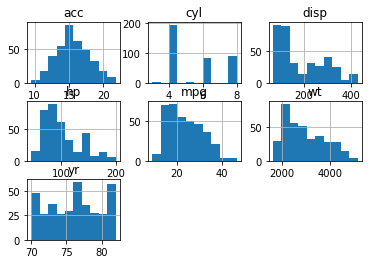

In [124]:
car_df.hist()

In [125]:
car_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.955883,0.857902,0.898313,-0.474818,-0.305033,-0.773752
disp,0.955883,1.000000,0.888231,0.940350,-0.489523,-0.315537,-0.807124
hp,0.857902,0.888231,1.000000,0.882085,-0.652216,-0.354527,-0.791483
wt,0.898313,0.940350,0.882085,1.000000,-0.382518,-0.268218,-0.832137
acc,-0.474818,-0.489523,-0.652216,-0.382518,1.000000,0.225736,0.375479
yr,-0.305033,-0.315537,-0.354527,-0.268218,0.225736,1.000000,0.552155
mpg,-0.773752,-0.807124,-0.791483,-0.832137,0.375479,0.552155,1.000000


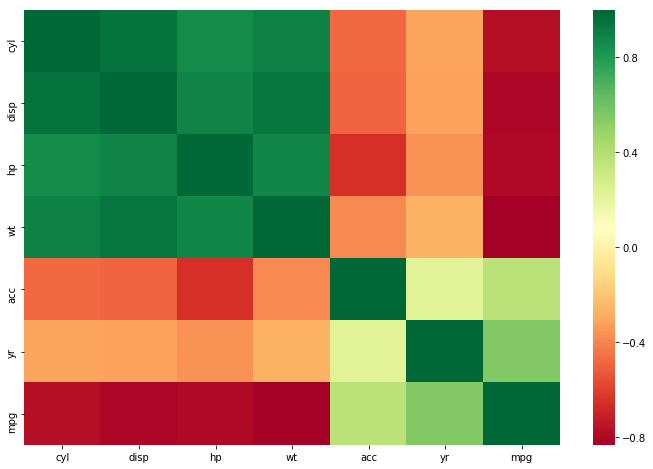

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(car_df.corr(),cmap='RdYlGn')

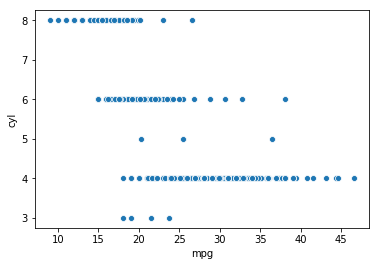

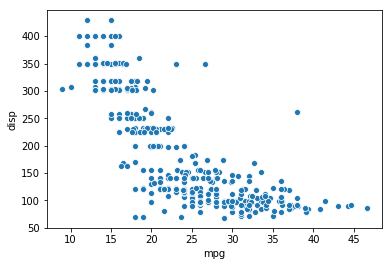

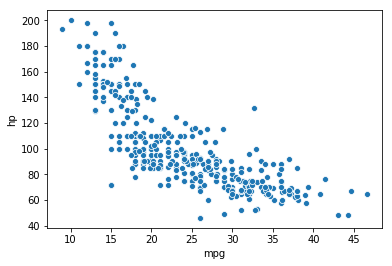

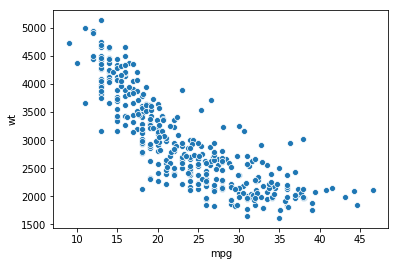

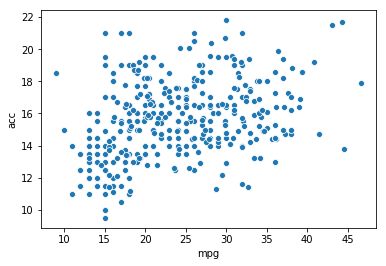

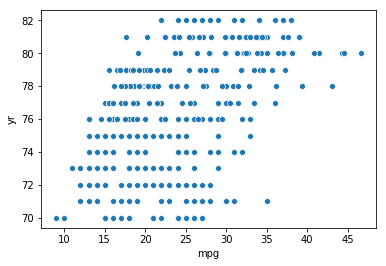

In [127]:
for i,cols in enumerate(list(car_df.drop(columns=['car name','mpg'],axis=1))):
    plt.figure(i)
    sns.scatterplot(car_df['mpg'],car_df[cols])

In [128]:
# Assigning labels to car name
car_df['car name']=LabelEncoder().fit_transform(car_df['car name'])

In [129]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 371
Data columns (total 8 columns):
car name    372 non-null int64
cyl         372 non-null int64
disp        372 non-null float64
hp          372 non-null float64
wt          372 non-null int64
acc         372 non-null float64
yr          372 non-null int64
mpg         372 non-null float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [130]:
#applying standard scalar 

data_tranformed=StandardScaler().fit_transform(car_df)

In [131]:
Median_values=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_tranformed)
    Median_values.append(kmeans.inertia_)

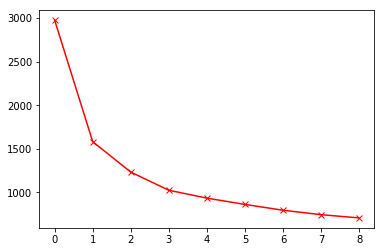

In [132]:
plt.plot(Median_values,'rx-')

In [133]:
# 5 is the optimal number for split

In [134]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(data_tranformed)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [135]:
labels=kmeans.labels_

In [136]:
len(labels)

372

In [137]:
car_df['labels']=labels

In [138]:
car_df

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
0,46,8,307.0,130.0,3504,12.0,70,18.0,1
1,33,8,350.0,165.0,3693,11.5,70,15.0,1
2,221,8,318.0,150.0,3436,11.0,70,18.0,1
3,12,8,304.0,150.0,3433,12.0,70,16.0,1
4,153,8,302.0,140.0,3449,10.5,70,17.0,1
5,134,8,429.0,198.0,4341,10.0,70,15.0,1
6,96,8,383.0,170.0,3563,10.0,70,15.0,1
7,54,8,400.0,150.0,3761,9.5,70,15.0,1
8,261,4,113.0,95.0,2372,15.0,70,24.0,0
9,210,6,198.0,95.0,2833,15.5,70,22.0,0


In [139]:
car_df['labels'].value_counts()

1    85
4    76
3    75
0    69
2    67
Name: labels, dtype: int64

In [140]:
car_df.isna().sum()


car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
labels      0
dtype: int64

In [141]:
set1=car_df[car_df['labels']==0]
set2=car_df[car_df['labels']==1]
set3=car_df[car_df['labels']==2]
set4=car_df[car_df['labels']==3]
set5=car_df[car_df['labels']==4]


In [142]:
Feature=set1.drop(columns=['car name','labels'])
target=set1.pop('car name')
s1m=LinearRegression().fit(Feature,target)
s1m.coef_

array([30.23551839, -1.0017148 , -0.52190716,  0.05454844, -2.25536119,
        1.72575908,  2.72402206])

In [143]:
Feature=set2.drop(columns=['car name','labels'])
target=set2.pop('car name')
s2m=LinearRegression().fit(Feature,target)
s2m.coef_

array([ 3.42343851e+01, -1.95482359e-03,  2.84253762e-01,  3.11076835e-02,
       -8.68844433e-01,  2.65094807e-01,  1.35954879e+00])

In [144]:
Feature=set3.drop(columns=['car name','labels'])
target=set3.pop('car name')
s3m=LinearRegression().fit(Feature,target)
s3m.coef_

array([-7.76092142e+00, -3.18982213e-01, -6.70096592e-01,  3.70843679e-03,
       -5.80011474e+00,  9.91290603e-01, -1.30188330e+00])

In [145]:
Feature=set4.drop(columns=['car name','labels'])
target=set4.pop('car name')
s4m=LinearRegression().fit(Feature,target)
s4m.coef_

array([32.89966125, -1.05513358, -2.32323343,  0.14066367, -7.01846516,
       -1.38290137,  4.31070931])

In [146]:
Feature=set5.drop(columns=['car name','labels'])
target=set5.pop('car name')
s5m=LinearRegression().fit(Feature,target)
s5m.coef_

array([ 21.85738634,  -0.0704249 ,  -2.89722801,   0.07245637,
       -10.61220161,  -1.81494082,  -0.78503933])